In [191]:
import datetime
# import pandas_datareader.data as web
from pandas_datareader import data as web

In [192]:
start= datetime.datetime(2015,1,1)
end= datetime.datetime.today()

aapl = web.DataReader('AAPL', 'yahoo', start, end)
ibm = web.DataReader('IBM', 'yahoo', start, end)
amzn = web.DataReader('AMZN', 'yahoo', start, end)

#Alternative way to download portfolio data:
#aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)

aapl.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-05-09,155.830002,151.490005,154.929993,152.059998,131577900.0,152.059998
2022-05-10,156.740005,152.929993,155.520004,154.509995,115366700.0,154.509995
2022-05-11,155.449997,145.809998,153.500000,146.500000,142689800.0,146.500000
2022-05-12,146.199997,138.800003,142.770004,142.559998,182602000.0,142.559998
2022-05-13,148.100006,143.110001,144.589996,147.110001,113787000.0,147.110001


Text(0.5, 1.0, 'AMZN')

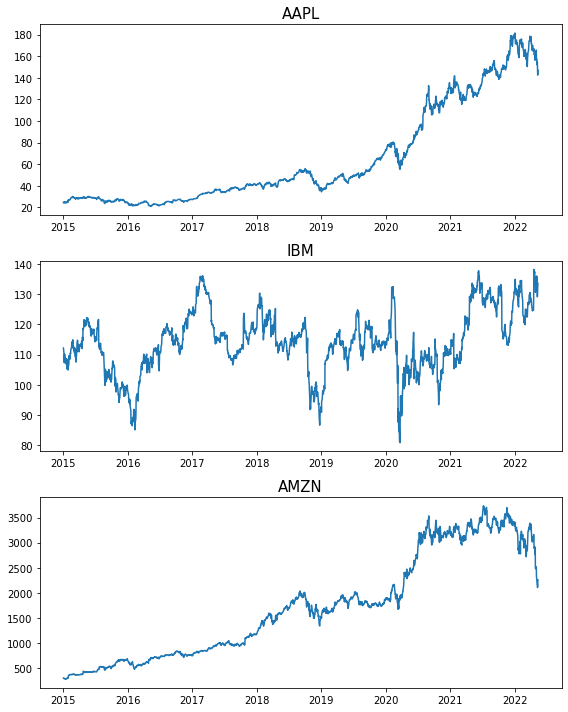

In [193]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 1, sharey=False, tight_layout=True,figsize=(8, 10))
axs[0].plot(aapl['Adj Close'])
axs[0].set_title('AAPL', size = 15)
axs[1].plot(ibm['Adj Close'])
axs[1].set_title('IBM', size = 15)
axs[2].plot(amzn['Adj Close'])
axs[2].set_title('AMZN', size = 15)

In [194]:
#library import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM

In [195]:
import tensorflow as tf

In [196]:
# CREATING OWN INDEX FOR FLEXIBILITY
obs = np.arange(1, len(aapl) + 1, 1)

# TAKING DIFFERENT INDICATORS FOR PREDICTION
aapl_adj = aapl["Adj Close"]

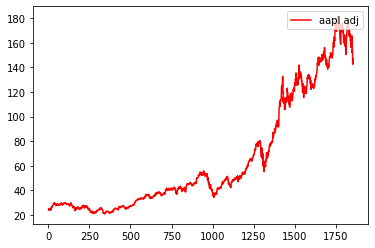

In [197]:
# PLOTTING ALL INDICATORS IN ONE PLOT
plt.plot(obs, aapl_adj, 'r', label = 'aapl adj')
plt.legend(loc = 'upper right')
plt.show()

In [198]:
# # PREPARATION OF TIME SERIES DATASE
# aapl_adj = np.reshape(aapl_adj.values, (len(aapl_adj),1)) # 1664 rows, 1 column
# scaler = MinMaxScaler(feature_range=(0, 1))
# aapl_adj = scaler.fit_transform(aapl_adj)

In [206]:
diff = lambda x: x.diff(1)
log_diff = lambda x: 100*np.log(x).diff(1)

aapl_adj_return = aapl_adj.transform({"Adj Close": log_diff}).dropna()

In [207]:
aapl_adj_return.describe()

,Adj Close
count,1854.000000
mean,0.096292
std,1.847249
min,-13.770791
25%,-0.696447
50%,0.089483
75%,1.019733
max,11.315735


In [227]:
# TRAIN-TEST-VAL SPLIT
n = aapl_adj_return.shape[0]

# Training data
train_n = int(n*0.7)
train_df = aapl_adj_return.iloc[0:train_n, :]

# Validation data
val_n = int(n*0.2)
val_df = aapl_adj_return.iloc[train_n:train_n+val_n, :]

# Testing data
test_df = aapl_adj_return.iloc[train_n+val_n:, :]

In [228]:
### Normalization
# train_mean = train_aapl.mean() # use the same set of mean and sd on all sets of data
# train_std = train_aapl.std()

# train_aapl = (train_aapl - train_mean) / train_std
# val_aapl = (val_aapl - train_mean) / train_std
# test_aapl = (test_aapl - train_mean) / train_std

<AxesSubplot:xlabel='Date'>

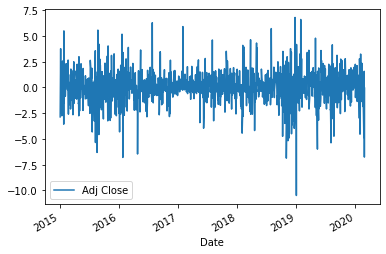

In [229]:
train_df.plot(y="Adj Close") 

<AxesSubplot:xlabel='Date'>

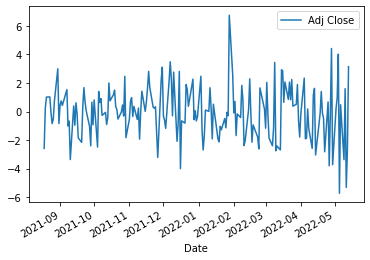

In [230]:
test_df.plot(y="Adj Close") 

<AxesSubplot:xlabel='Date'>

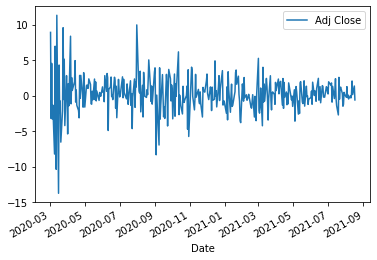

In [231]:
val_df.plot(y="Adj Close") 

In [232]:
#### 这个 window generator mess up了

# class WindowGenerator():

#     def __init__(
#         self, input_width, label_width, shift,
#         train_aapl=train_aapl, val_aapl=val_aapl, test_aapl=test_aapl, ####要不直接改成df？？？
#         label_columns=None
#     ):
#         # Store the raw data.
#         self.train = train_aapl
#         self.val = val_aapl
#         self.test = test_aapl

#         # Work out the label column indices.
#         self.label_columns = label_columns
#         if label_columns is not None:
#             self.label_columns_indices = {
#                 name: i for i, name in enumerate(label_columns)
#             }
#         self.column_indices = {
#             name: i for i, name in enumerate(self.train.columns) ####这里可能有bug
#         }

#         # Work out the window parameters.
#         self.input_width = input_width
#         self.label_width = label_width
#         self.shift = shift

#         self.total_window_size = input_width + shift

#         self.input_slice = slice(0, input_width)
#         self.input_indices = np.arange(self.total_window_size)[self.input_slice]

#         self.label_start = self.total_window_size - self.label_width
#         self.labels_slice = slice(self.label_start, None)
#         self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

#     def __repr__(self):
#         return '\n'.join(
#             [
#                 f'Total window size: {self.total_window_size}',
#                 f'Input indices: {self.input_indices}',
#                 f'Label indices: {self.label_indices}',
#                 f'Label column name(s): {self.label_columns}'
#             ]
#         )

#     def split_window(self, features):
#         inputs = features[:, self.input_slice, :]
#         labels = features[:, self.labels_slice, :]
#         if self.label_columns is not None:
#             labels = tf.stack(
#                 [
#                     labels[:, :, self.column_indices[name]]
#                     for name in self.label_columns
#                 ], axis=-1
#             )

#         # Slicing doesn't preserve static shape information, so set the shapes
#         # manually. This way the `tf.data.Datasets` are easier to inspect.
#         inputs.set_shape([None, self.input_width, None])
#         labels.set_shape([None, self.label_width, None])

#         return inputs, labels

#     def plot(self, model=None, plot_col='Adj Close', max_subplots=3):
    
#         inputs, labels = self.example
#         plt.figure(figsize=(12, 8))
#         plot_col_index = self.column_indices[plot_col]
#         max_n = min(max_subplots, len(inputs))

#         for n in range(max_n):
#             plt.subplot(max_n, 1, n+1)
#             plt.ylabel(f'{plot_col}')
#             plt.plot(
#                 self.input_indices,
#                 inputs[n, :, plot_col_index],
#                 label='Inputs', marker='.', zorder=-10
#             )

#             if self.label_columns:
#                 label_col_index = self.label_columns_indices.get(plot_col, None)
#             else:
#                 label_col_index = plot_col_index

#             if label_col_index is None:
#                 continue

#             plt.scatter(self.label_indices, labels[n, :, label_col_index],
#                         edgecolors='k', label='Labels', c='#2ca02c', s=64)

#             if model is not None:
#                 predictions = model(inputs)
#                 plt.scatter(
#                     self.label_indices, predictions[n, :, 0],
#                     marker='X', edgecolors='k', label='Predictions',
#                     c='#ff7f0e', s=64
#                 )

#             if n == 0:
#                 plt.legend()

#         plt.xlabel('Months') #??????????????? Daily data?

#     def make_dataset(self, data):
#         data = np.array(data, dtype=np.float32)
#         ds = tf.keras.preprocessing.timeseries_dataset_from_array(
#             data=data,
#             targets=None,
#             sequence_length=self.total_window_size,
#             sequence_stride=1,
#             shuffle=True,
#             batch_size=24,
#         )

#         ds = ds.map(self.split_window)

#         return ds

#     @property
#     def train(self):
#         return self.make_dataset(self.train)

#     @property
#     def val(self):
#         return self.make_dataset(self.val)

#     @property
#     def test(self):
#         return self.make_dataset(self.test)

#     @property
#     def example(self):
#         """Get and cache an example batch of `inputs, labels` for plotting."""
#         result = getattr(self, '_example', None)
#         if result is None:
#             # No example batch was found, so get one from the `.train` dataset
#             result = next(iter(self.train))
#             # And cache it for next time
#             self._example = result

#         return result

In [233]:
class WindowGenerator():
 
    def __init__(
        self, input_width, label_width, shift,
        train_df=train_df, val_df=val_df, test_df=test_df,
        label_columns=None
    ):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df
 
        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {
                name: i for i, name in enumerate(label_columns)
            }
        self.column_indices = {
            name: i for i, name in enumerate(train_df.columns)
        }
 
        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift
 
        self.total_window_size = input_width + shift
 
        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]
 
        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]
 
    def __repr__(self):
        return '\n'.join(
            [
                f'Total window size: {self.total_window_size}',
                f'Input indices: {self.input_indices}',
                f'Label indices: {self.label_indices}',
                f'Label column name(s): {self.label_columns}'
            ]
        )
 
    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [
                    labels[:, :, self.column_indices[name]]
                    for name in self.label_columns
                ], axis=-1
            )
 
        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])
 
        return inputs, labels
 
    def plot(self, model=None, plot_col='Adj Close', max_subplots=3):
   
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
 
        for n in range(max_n):
            plt.subplot(max_n, 1, n+1)
            plt.ylabel(f'{plot_col}')
            plt.plot(
                self.input_indices,
                inputs[n, :, plot_col_index],
                label='Inputs', marker='.', zorder=-10
            )
 
            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index
 
            if label_col_index is None:
                continue
 
            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', label='Labels', c='#2ca02c', s=64)
 
            if model is not None:
                predictions = model(inputs)
                plt.scatter(
                    self.label_indices, predictions[n, :, 0],
                    marker='X', edgecolors='k', label='Predictions',
                    c='#ff7f0e', s=64
                )
 
            if n == 0:
                plt.legend()
 
        plt.xlabel('Months')
 
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=24,
        )
 
        ds = ds.map(self.split_window)
 
        return ds
 
    @property
    def train(self):
        return self.make_dataset(self.train_df)
 
    @property
    def val(self):
        return self.make_dataset(self.val_df)
 
    @property
    def test(self):
        return self.make_dataset(self.test_df)
 
    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
 
        return result



In [234]:
INPUT_WIDTH = 24
LABEL_WIDTH = 1 ## how many y to generate
SHIFT = 1 ## shift the last value in x to y

eval_window = WindowGenerator(
    input_width=INPUT_WIDTH, label_width=LABEL_WIDTH,
    shift=SHIFT, label_columns=["Adj Close"]
)

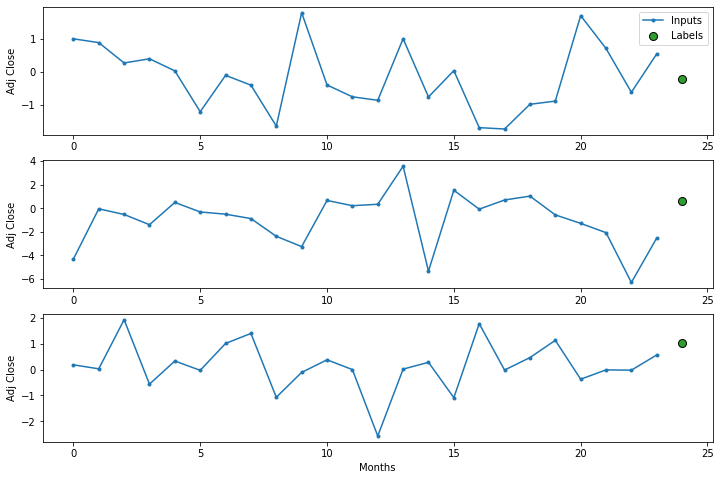

In [235]:
eval_window.plot()

In [236]:
MAX_EPOCHS = 250

def compile_and_fit(model, window, patience=5): ## patience: MSE not improve after # of patience iteration, stop

    early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=patience,
        mode='min'
    )

    model.compile(
        loss=tf.losses.MeanSquaredError(),
        optimizer=tf.optimizers.RMSprop(),
    )


    history = model.fit(
        window.train, epochs=MAX_EPOCHS,
        validation_data=window.val,
        callbacks=[early_stopping]
    )

    return history

## Model 1: Baseline

In [237]:
class BaselinePricePrediction(tf.keras.Model):
    def __init__(self, gamma, label_index=None):
        super().__init__()
        self.gamma = gamma
        self.label_index = label_index

    def call(self, inputs):
        if self.label_index is None:
            x = self.gamma*inputs + (1-self.gamma)*0
        else:
            x = self.gamma*inputs[:, :, self.label_index] + (1-self.gamma)*0

        return x[:, :, tf.newaxis]

In [238]:
baseline = BaselinePricePrediction(gamma=0.8, label_index=eval_window.column_indices["Adj Close"]) ## try change gamma value here
baseline.compile(loss=tf.losses.MeanSquaredError())

val_performance = {}
performance = {}

val_performance['Baseline'] = baseline.evaluate(eval_window.val)
performance['Baseline'] = baseline.evaluate(eval_window.test, verbose=0)

15/15 [==============================] - 0s 666us/step - loss: 7.8799


In [239]:
baseline.evaluate(eval_window.train)

54/54 [==============================] - 0s 971us/step - loss: 4.0168


4.016779899597168

In [240]:
val_performance

{'Baseline': 7.879854679107666}

In [241]:
performance

{'Baseline': 5.512584686279297}

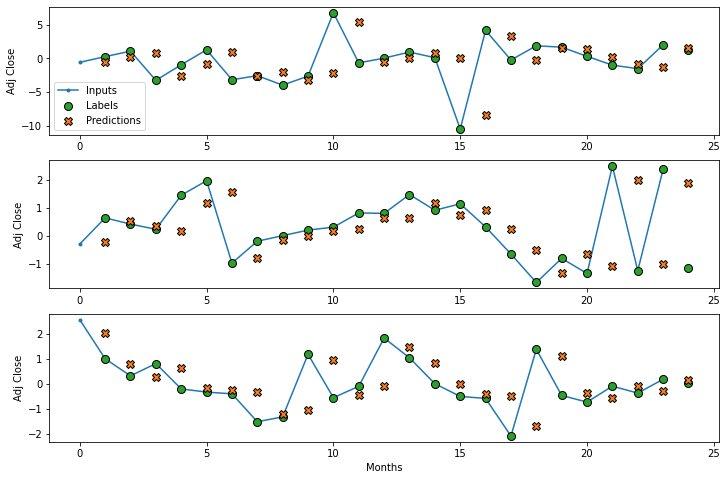

In [242]:
wide_window_baseline = WindowGenerator(
    input_width=INPUT_WIDTH, label_width=INPUT_WIDTH,
    shift=SHIFT, label_columns=["Adj Close"]
)

wide_window_baseline.plot(baseline, max_subplots=3)

## Model 2: Convolution 1D

In [244]:
CONV_WIDTH = 12 ## window size. 这里Chase用的是过去一年的data，我们是daily data所以需要改一下

conv_window = WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1
)

conv_model = tf.keras.Sequential(
    [
        tf.keras.layers.Conv1D(filters=8, kernel_size=(CONV_WIDTH,), activation="relu"),
        tf.keras.layers.Dense(units=4, activation="relu"),
        tf.keras.layers.Dense(units=1),
    ]
)

compile_and_fit(conv_model, conv_window)

val_performance['Conv1D'] = conv_model.evaluate(eval_window.val)
performance['Conv1D'] = conv_model.evaluate(eval_window.test, verbose=0)

Epoch 1/250
54/54 [==============================] - 1s 4ms/step - loss: 3.1336 - val_loss: 5.8331
Epoch 2/250
54/54 [==============================] - 0s 3ms/step - loss: 2.6705 - val_loss: 5.2820
Epoch 3/250
54/54 [==============================] - 0s 3ms/step - loss: 2.5453 - val_loss: 5.0871
Epoch 4/250
54/54 [==============================] - 0s 3ms/step - loss: 2.5017 - val_loss: 4.9854
Epoch 5/250
54/54 [==============================] - 0s 3ms/step - loss: 2.4795 - val_loss: 4.9479
Epoch 6/250
54/54 [==============================] - 0s 3ms/step - loss: 2.4649 - val_loss: 4.9086
Epoch 7/250
54/54 [==============================] - 0s 3ms/step - loss: 2.4554 - val_loss: 4.9020
Epoch 8/250
54/54 [==============================] - 0s 3ms/step - loss: 2.4478 - val_loss: 4.8970
Epoch 9/250
54/54 [==============================] - 0s 3ms/step - loss: 2.4412 - val_loss: 4.9042
Epoch 10/250
54/54 [==============================] - 0s 3ms/step - loss: 2.4334 - val_loss: 4.9048
Epoch 11/

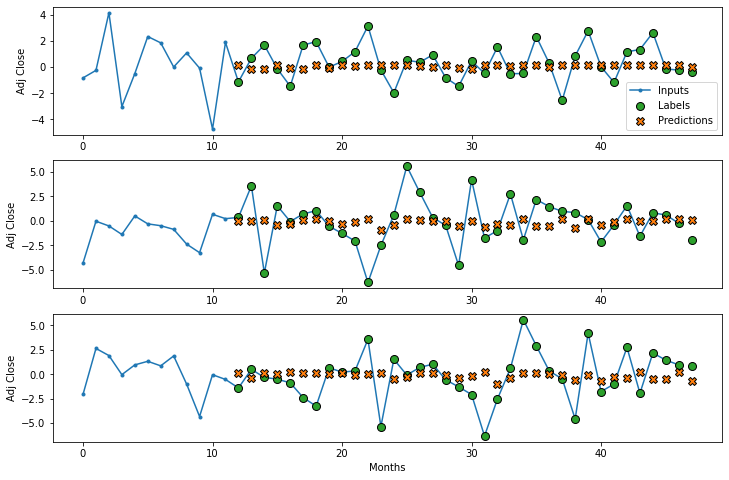

In [245]:
wide_window_conv = WindowGenerator(
    input_width=36 + (CONV_WIDTH - 1),
    label_width=36,
    shift=SHIFT
)

wide_window_conv.plot(conv_model, max_subplots=3)

## Model 3: Simple RNN

In [246]:
srnn_model = tf.keras.Sequential(
    [
        tf.keras.layers.SimpleRNN(8, activation="relu", return_sequences=False), ## 8 filters
        tf.keras.layers.Dense(4),
        tf.keras.layers.Dense(1),
    ]
)

compile_and_fit(srnn_model, eval_window)

val_performance['SimpleRNN'] = srnn_model.evaluate(eval_window.val)
performance['SimpleRNN'] = srnn_model.evaluate(eval_window.test, verbose=0)

Epoch 1/250
54/54 [==============================] - 1s 7ms/step - loss: 2.6228 - val_loss: 4.4310
Epoch 2/250
54/54 [==============================] - 0s 5ms/step - loss: 2.5563 - val_loss: 4.3828
Epoch 3/250
54/54 [==============================] - 0s 7ms/step - loss: 2.5280 - val_loss: 4.3609
Epoch 4/250
54/54 [==============================] - 0s 5ms/step - loss: 2.5120 - val_loss: 4.3353
Epoch 5/250
54/54 [==============================] - 0s 5ms/step - loss: 2.4985 - val_loss: 4.3290
Epoch 6/250
54/54 [==============================] - 0s 5ms/step - loss: 2.4930 - val_loss: 4.3274
Epoch 7/250
54/54 [==============================] - 0s 5ms/step - loss: 2.4883 - val_loss: 4.3242
Epoch 8/250
54/54 [==============================] - 0s 5ms/step - loss: 2.4869 - val_loss: 4.3204
Epoch 9/250
54/54 [==============================] - 0s 5ms/step - loss: 2.4840 - val_loss: 4.3193
Epoch 10/250
54/54 [==============================] - 0s 5ms/step - loss: 2.4822 - val_loss: 4.3243
Epoch 11/

In [248]:
val_performance

{'Baseline': 7.879854679107666,
 'Conv1D': 4.570629119873047,
 'SimpleRNN': 4.330139636993408}

In [247]:
performance

{'Baseline': 5.512584686279297,
 'Conv1D': 3.592686176300049,
 'SimpleRNN': 3.5913782119750977}

InvalidArgumentError: Index out of range using input dim 2; input has only 2 dims [Op:StridedSlice] name: strided_slice/

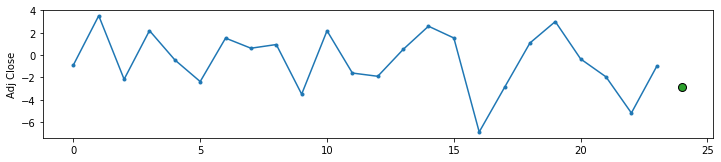

In [251]:
#### 这个plot的error msg我看不明白

wide_window_conv = WindowGenerator(
    input_width=36 + (CONV_WIDTH - 1),
    label_width=36,
    shift=SHIFT
)

wide_window_conv.plot(srnn_model, max_subplots=3)

## Model 4: LSTM

In [252]:
lstm_model = tf.keras.Sequential(
    [
        tf.keras.layers.LSTM(8, activation="relu", return_sequences=False),
        tf.keras.layers.Dense(4),
        tf.keras.layers.Dense(1),
    ]
)

compile_and_fit(lstm_model, eval_window)

val_performance['LSTM'] = lstm_model.evaluate(eval_window.val)
performance['LSTM'] = lstm_model.evaluate(eval_window.test, verbose=0)

Epoch 1/250
54/54 [==============================] - 2s 11ms/step - loss: 2.5251 - val_loss: 4.4048
Epoch 2/250
54/54 [==============================] - 0s 7ms/step - loss: 2.4935 - val_loss: 4.3877
Epoch 3/250
54/54 [==============================] - 0s 7ms/step - loss: 2.4897 - val_loss: 4.3710
Epoch 4/250
54/54 [==============================] - 0s 7ms/step - loss: 2.4881 - val_loss: 4.3580
Epoch 5/250
54/54 [==============================] - 0s 7ms/step - loss: 2.4858 - val_loss: 4.3667
Epoch 6/250
54/54 [==============================] - 0s 7ms/step - loss: 2.4851 - val_loss: 4.3777
Epoch 7/250
54/54 [==============================] - 0s 6ms/step - loss: 2.4842 - val_loss: 4.3481
Epoch 8/250
54/54 [==============================] - 0s 6ms/step - loss: 2.4831 - val_loss: 4.3669
Epoch 9/250
54/54 [==============================] - 0s 7ms/step - loss: 2.4804 - val_loss: 4.3598
Epoch 10/250
54/54 [==============================] - 0s 6ms/step - loss: 2.4807 - val_loss: 4.3577
Epoch 11

In [253]:
val_performance

{'Baseline': 7.879854679107666,
 'Conv1D': 4.570629119873047,
 'SimpleRNN': 4.330139636993408,
 'LSTM': 4.370357990264893}

In [254]:
performance

{'Baseline': 5.512584686279297,
 'Conv1D': 3.592686176300049,
 'SimpleRNN': 3.5913782119750977,
 'LSTM': 3.590559720993042}

InvalidArgumentError: Index out of range using input dim 2; input has only 2 dims [Op:StridedSlice] name: strided_slice/

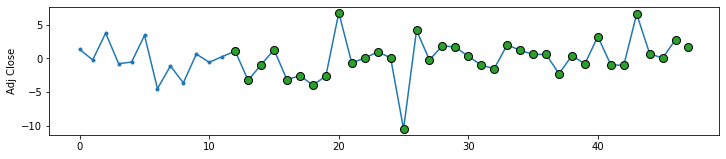

In [255]:
wide_window_conv = WindowGenerator(
    input_width=36 + (CONV_WIDTH - 1),
    label_width=36,
    shift=SHIFT
)

wide_window_conv.plot(lstm_model, max_subplots=3)

## Model 5: GRU

In [257]:
gru_model = tf.keras.Sequential(
    [
        tf.keras.layers.GRU(8, activation="relu", return_sequences=False),
        tf.keras.layers.Dense(4),
        tf.keras.layers.Dense(1),
    ]
)

compile_and_fit(gru_model, eval_window)

val_performance['GRU'] = gru_model.evaluate(eval_window.val)
performance['GRU'] = gru_model.evaluate(eval_window.test, verbose=0)

Epoch 1/250
54/54 [==============================] - 2s 12ms/step - loss: 2.6250 - val_loss: 4.5027
Epoch 2/250
54/54 [==============================] - 0s 7ms/step - loss: 2.5374 - val_loss: 4.4484
Epoch 3/250
54/54 [==============================] - 0s 9ms/step - loss: 2.5136 - val_loss: 4.4222
Epoch 4/250
54/54 [==============================] - 0s 8ms/step - loss: 2.5011 - val_loss: 4.3939
Epoch 5/250
54/54 [==============================] - 0s 9ms/step - loss: 2.4947 - val_loss: 4.3899
Epoch 6/250
54/54 [==============================] - 1s 11ms/step - loss: 2.4921 - val_loss: 4.3604
Epoch 7/250
54/54 [==============================] - 0s 8ms/step - loss: 2.4886 - val_loss: 4.3553
Epoch 8/250
54/54 [==============================] - 0s 7ms/step - loss: 2.4879 - val_loss: 4.3531
Epoch 9/250
54/54 [==============================] - 0s 7ms/step - loss: 2.4857 - val_loss: 4.3553
Epoch 10/250
54/54 [==============================] - 0s 7ms/step - loss: 2.4847 - val_loss: 4.3343
Epoch 1

In [258]:
val_performance

{'Baseline': 7.879854679107666,
 'Conv1D': 4.570629119873047,
 'SimpleRNN': 4.330139636993408,
 'LSTM': 4.370357990264893,
 'GRU': 4.353084087371826}

In [259]:
performance

{'Baseline': 5.512584686279297,
 'Conv1D': 3.592686176300049,
 'SimpleRNN': 3.5913782119750977,
 'LSTM': 3.590559720993042,
 'GRU': 3.547429084777832}